<a href="https://colab.research.google.com/github/bagas32/latihan/blob/main/grouping_filtering_sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyst Data Ecommerce

**quest 1: Grouping**

Task 1.1: Hitung total belanja (total_price) per customer.
  - Laporan: tampilkan tabel customer + total_belanja.

Task 1.2: Cari rata-rata price per kategori produk.
  - Laporan: tabel category + avg_price.

Task 1.3: Hitung jumlah quantity per kota.
  - Laporan: tabel city + total_quantity.

**quest 2: Filtering**

Task 2.1: Ambil semua order dengan quantity > 2.
  - Laporan: tampilkan tabel hasil filter.

Task 2.2: Ambil semua order dari customer tertentu (misal: "Andi").
  - Laporan: tabel order milik Andi.

Task 2.3: Ambil semua order dari kota "Jakarta" dengan total_price > 100000.
  - Laporan: tabel hasil filter.

**quest 3: Sorting + Top N**

Task 3.1: Cari 3 customer dengan total belanja terbesar.
  - Laporan: tabel customer + total_belanja (top 3).

Task 3.2: Cari 2 kategori produk dengan penjualan terbanyak (quantity).
  - Laporan: tabel category + total_quantity (top 2).

**Bonus Challenge**

Task 4.1: Gabungkan hasil 1 & 2 → misalnya: dari semua customer, siapa yang belanjanya paling banyak di kota tertentu.
  - Laporan: tampilkan tabel hasil merge + analisis singkat.

Task 4.2: Visualisasi dengan bar chart: total belanja per kategori.
  - Laporan: tampilkan grafik.

**Output laporan akhir:**

Ada tabel hasil tiap quest.

Ada sedikit analisis (1–2 kalimat per quest).

(Opsional) grafik bar chart/biasa.

Dataframe:

In [ ]:
import pandas as pd
import numpy as np
import random

# List contoh data
customers = ["Andi", "Budi", "Citra", "Dewi", "Eka", "Farhan", "Gita", "Hadi", "Indah", "Joko",
             "Kiki", "Lina", "Made", "Nina", "Oscar", "Putri", "Rizky", "Sari", "Tono", "Vina"]

cities = ["Jakarta", "Bandung", "Surabaya", "Yogyakarta", "Semarang",
          "Medan", "Makassar", "Palembang", "Denpasar", "Balikpapan"]

products = ["Laptop", "Mouse", "Keyboard", "Monitor", "Headset",
            "Webcam", "Printer", "Scanner", "Speaker", "Router"]

categories = ["Elektronik", "Makanan", "Minuman", "Kesehatan", "Kecantikan",
              "Otomotif", "Pakaian", "Olahraga", "Rumah Tangga", "Mainan"]

# Generate DataFrame baru
np.random.seed(42)
n = 15

df = pd.DataFrame({
    "order_id": range(1, n+1),
    "customer": random.sample(customers, n),  # ambil 15 nama unik biar ga ada duplikat
    "customer_id": [f"c{100+i}" for i in range(n)],
    "city": np.random.choice(cities, n),
    "city_id": [f"ct{np.random.randint(1, 11):02d}" for _ in range(n)],
    "product": np.random.choice(products, n),
    "category": np.random.choice(categories, n),
    "quantity": np.random.randint(1, 10, n),
    "price": np.random.randint(10000, 10000000, n)
})

# Hitung total_price
df["total_price"] = df["quantity"] * df["price"]

# Tampilkan hasil
display(df)


,order_id,customer,customer_id,city,city_id,product,category,quantity,price,total_price
0,1,Vina,c100,Makassar,ct05,Speaker,Kecantikan,4,6090526,24362104
1,2,Oscar,c101,Yogyakarta,ct02,Keyboard,Makanan,6,5183036,31098216
2,3,Hadi,c102,Palembang,ct08,Headset,Kesehatan,2,1435472,2870944
3,4,Citra,c103,Semarang,ct06,Keyboard,Pakaian,2,58984,117968
4,5,Rizky,c104,Makassar,ct02,Printer,Olahraga,4,6566168,26264672
5,6,Lina,c105,Balikpapan,ct05,Headset,Minuman,8,1514384,12115072
6,7,Budi,c106,Surabaya,ct01,Speaker,Elektronik,7,2240919,15686433
7,8,Andi,c107,Makassar,ct10,Printer,Kesehatan,9,6950119,62551071
8,9,Made,c108,Palembang,ct06,Mouse,Makanan,8,1747095,13976760
9,10,Sari,c109,Semarang,ct09,Monitor,Olahraga,5,4790450,23952250


In [ ]:
#task 1.1
df.groupby("customer").agg({"total_price": "sum"})

,total_price
customer,
Andi,62551071
Budi,15686433
Citra,117968
Dewi,85299471
Gita,17934280
Hadi,2870944
Joko,14958688
Kiki,34770051
Lina,12115072


In [ ]:
#task 1.2
df.groupby("category").agg({"price": "mean"})

,price
category,
Elektronik,2.240919e+06
Kecantikan,6.090526e+06
Kesehatan,5.288312e+06
Mainan,9.477719e+06
Makanan,3.016650e+06
Minuman,1.514384e+06
Olahraga,5.678309e+06
Otomotif,3.052562e+06
Pakaian,5.898400e+04


In [ ]:
#task 1.3
df.groupby("city").agg({"quantity": "sum"})

,quantity
city,
Balikpapan,8
Makassar,17
Medan,9
Palembang,23
Semarang,7
Surabaya,16
Yogyakarta,8


In [ ]:
#task 2.1
df[df["quantity"] > 2]

,order_id,customer,customer_id,city,city_id,product,category,quantity,price,total_price
0,1,Vina,c100,Makassar,ct05,Speaker,Kecantikan,4,6090526,24362104
1,2,Oscar,c101,Yogyakarta,ct02,Keyboard,Makanan,6,5183036,31098216
4,5,Rizky,c104,Makassar,ct02,Printer,Olahraga,4,6566168,26264672
5,6,Lina,c105,Balikpapan,ct05,Headset,Minuman,8,1514384,12115072
6,7,Budi,c106,Surabaya,ct01,Speaker,Elektronik,7,2240919,15686433
7,8,Andi,c107,Makassar,ct10,Printer,Kesehatan,9,6950119,62551071
8,9,Made,c108,Palembang,ct06,Mouse,Makanan,8,1747095,13976760
9,10,Sari,c109,Semarang,ct09,Monitor,Olahraga,5,4790450,23952250
11,12,Putri,c111,Palembang,ct10,Mouse,Makanan,5,2119818,10599090
12,13,Gita,c112,Palembang,ct03,Router,Otomotif,8,2241785,17934280


In [ ]:
#task 2.2
df[df["customer"] == "Andi"]


,order_id,customer,customer_id,city,city_id,product,category,quantity,price,total_price
7,8,Andi,c107,Makassar,ct10,Printer,Kesehatan,9,6950119,62551071


In [ ]:
#task 2.3
df[(df["city"] == "Jakarta") & (df["total_price"] > 100000)]

,order_id,customer,customer_id,city,city_id,product,category,quantity,price,total_price


In [ ]:
#task 3.1
df.groupby("customer").agg({"total_price": "sum"}).sort_values(by="total_price", ascending=False).head(3)

,total_price
customer,
Dewi,85299471
Andi,62551071
Kiki,34770051


In [ ]:
#task 3.2
df.groupby("category").agg({"quantity": "sum"}).sort_values(by="quantity", ascending=False).head(2)

,quantity
category,
Makanan,19
Otomotif,17


In [ ]:
#task 4.1
df_merge = df.groupby(["customer", "city"]).agg({"total_price": "sum"}).reset_index()
display(df_merge)

,customer,city,total_price
0,Andi,Makassar,62551071
1,Budi,Surabaya,15686433
2,Citra,Semarang,117968
3,Dewi,Medan,85299471
4,Gita,Palembang,17934280
5,Hadi,Palembang,2870944
6,Joko,Yogyakarta,14958688
7,Kiki,Surabaya,34770051
8,Lina,Balikpapan,12115072
9,Made,Palembang,13976760


<Axes: xlabel='city'>

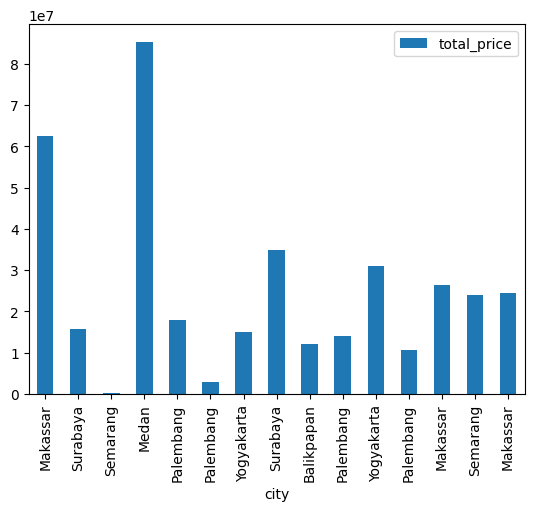

In [ ]:
#task 4.2
df_merge.plot(kind="bar", x="city", y="total_price")

# **Laporan**

## Quest 1 – grouping

Kode yang digunakan:

**task 1.1 - task 1.3**

Hasil:
### task 1.1
tabel customer dan total price
### task 1.2
tabel category dan avg_price.
### task 1.3
tabel city dan total quantity

## Analisis:
Dari hasil ini terlihat struktur dataset yang dipanggil sudah benar dengan kolom customer dan total price , category dan average price, city dan total quantity. Data tampak rapi dan tidak ada nilai kosong.

## Quest 2 – filtering

Kode yang digunakan:

**task 2.1 - 2.3**

Hasil:
### task 2.1
tabel data dengan quantity lebih dari 2
### task 2.2
tabel order dengan nama andi
### task 2.3
tabel order kota jakarta dengan harga lebih dari 100.000

## Analisis:
Bagian akhir dataset terlihat bahwa tidak ada order yang berasal dari jakarta dengan price yang lebih dari 100.000 .

Quest 3 – sorting dan top N

Kode yang digunakan:

**task 3.1 - task 3.2**

Hasil:
### task 3.1
tabel top 3 customer dan total_belanja.
### task 3.2
tabel top 2 category dan total_quantity

Analisis:
Customer dengan total transaksi tertinggi adalah
- Dewi dengan nilai Rp 85.299.471
- Andi dengan nilai Rp 62.551.071
- Kiki dengan nilai Rp 34.770.051

category dengan total quantity tertinggi adalah
- Makanan	dengan total pesanan sebanyak 19
- Otomotif	dengan total pesanan sebanyak 17

Hal ini menunjukkan Dewi merupakan pembeli paling loyal.
dan makanan merupakan category yang sering dipesan.

Quest 4 – merging dan analisa

Kode yang digunakan:

**task 4.1 - task 4.2**

Hasil:
### task 4.1

### task 4.2

Analisis:
Medan adalah kota dengan penjualan tertinggi. Hal ini didorong oleh total pembelian yang sangat besar dari Dewi, salah satu pelanggan utama di kota tersebut.

Makassar juga merupakan pasar yang signifikan, didukung oleh penjualan yang tinggi dari Andi dan pelanggan lain seperti Rizky dan Vina.

Palembang juga menunjukkan angka penjualan yang kuat, dengan beberapa pelanggan seperti Gita, Hadi, dan Made yang berkontribusi secara signifikan.

Meskipun terdapat pelanggan di Surabaya dan Semarang, total penjualan di kedua kota ini relatif lebih rendah jika dibandingkan dengan Medan, Makassar, atau Palembang. Ini menunjukkan bahwa meskipun ada pelanggan, volume atau nilai transaksi mereka mungkin tidak sebesar di kota-kota lain.